# BI Discussion Submissions – Analysis Notebook
**Author:** Abdellah Boudlal  
**Created:** 2025-10-27 21:19

This notebook loads the cleaned CSV and analyzes how many times each option is repeated in:
- `activity_1`
- `activity_2`
- `activity_3`
- `tool_not_now`

> ⚙️ **Instructions:** Put your CSV in the same folder as this notebook and name it `bi_discussion_submissions.csv`.  
If your file has a different name or location, change the `csv_path` variable below.


## 1. Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import re


# Configure pandas display
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 120)




## 2. Load Data

In [2]:
# Read CSV
df = pd.read_csv('bi_discussion_submissions.csv')

# Show basic info
print("Shape:", df.shape)
df.head(15)


Shape: (44, 6)


,name,activity_1,activity_2,activity_3,tool_not_now,tool_want_now
0,Molly,NaN,NaN,NaN,NaN,NaN
1,Molly,Integration,Data Cleaning,Machine Learning,Shiny,Python
2,MoW,NaN,NaN,NaN,NaN,NaN
3,MO,Data Visualization,Data Analysis,Real Time Processing,Metabase.,Apache Spark
4,Sandra,Data Visualization,Data Transformation,Data Reporting,Hadoop,Power BI
5,Sandra,NaN,NaN,NaN,NaN,NaN
6,Karli,NaN,NaN,NaN,NaN,NaN
7,Karli,Data Cleaning,Data Transformation,Data Visualization,Shiny.,Apache Spark
8,Reese,NaN,NaN,NaN,NaN,NaN
9,Agnes,NaN,NaN,NaN,NaN,NaN


## 3. Basic Cleaning (trim spaces, unify missing)

In [3]:
# Clean and standardize all columns
for col in df.columns:
    if df[col].dtype == 'object':
        # Strip whitespace
        df[col] = df[col].astype(str).str.strip()

        # Replace blanks / invalids with NaN
        df[col] = df[col].replace({'': np.nan, 'nan': np.nan, 'None': np.nan})

        # Clean unwanted patterns (real newlines, numbering, etc.)
        df[col] = df[col].apply(lambda x: re.sub(r'\n+', ' ', x) if isinstance(x, str) else x)
        df[col] = df[col].apply(lambda x: re.sub(r'\b\d+\.\s*', '', x) if isinstance(x, str) else x)
        df[col] = df[col].apply(lambda x: re.sub(r'\b\d+\b', '', x) if isinstance(x, str) else x)
        df[col] = df[col].apply(lambda x: re.sub(r'\s{2,}', ' ', x).strip() if isinstance(x, str) else x)

# Drop fully-empty rows across the key columns
key_cols = ['activity_1', 'activity_2', 'activity_3', 'tool_not_now']
existing_cols = [c for c in key_cols if c in df.columns]
df = df.dropna(how='all', subset=existing_cols)

# Standardize tool_want_now values
df['tool_want_now'] = df['tool_want_now'].replace({
    r".*Spark.*": "Apache Spark",   # any phrase containing 'Spark'
    r".*Power BI.*": "Power BI",    # any phrase containing 'Power BI'
    r".*Tableau.*": "Tableau",      # any phrase containing 'Tableau'
}, regex=True)

# Preview cleaned dataset
df.head(50)


,name,activity_1,activity_2,activity_3,tool_not_now,tool_want_now
1,Molly,Integration,Data Cleaning,Machine Learning,Shiny,Python
3,MO,Data Visualization,Data Analysis,Real Time Processing,Metabase.,Apache Spark
4,Sandra,Data Visualization,Data Transformation,Data Reporting,Hadoop,Power BI
7,Karli,Data Cleaning,Data Transformation,Data Visualization,Shiny.,Apache Spark
10,Agnes,Data collection,Data analysis,Data visualization,Shiny,Power BI
13,Kaitlin,Data Analysis,Data visualization,Data transformation,Apache Spark.,Tableau
14,Becky,Data collection,Data Cleaning,Data Transformation =,PowerBI,SAS
17,Steve,Data Collection,Data Cleaning,Data Analysis,Oracle BI,Apache Spark
18,Lynzie,Data Visualization,Data Cleaning,Real-Time Processing,Apache Spark,Power BI
20,Keiko,Data Analysis,Data Visualization,Data Cleaning,Shiny,Python


## 4. Summary of Columns

In [4]:
df.describe(include='all').T

,count,unique,top,freq
name,24,24,Molly,1
activity_1,24,9,Data Visualization,7
activity_2,24,9,Data Cleaning,7
activity_3,24,17,Real-Time Processing,3
tool_not_now,24,15,Shiny,5
tool_want_now,24,5,Power BI,10


## 5. Frequency Counts by Column

In [5]:
def value_counts_sorted(series):
    s = series.dropna().astype(str).str.strip()
    s = s[s.ne('')]
    counts = s.value_counts().sort_values(ascending=False)
    return counts.to_frame(name='count')

cols_to_check = ['activity_1', 'activity_2', 'activity_3', 'tool_not_now', 'tool_want_now']
[ c for c in cols_to_check if c not in df.columns ]


[]

### 5.1 — `activity_1` counts

In [6]:
if 'activity_1' in df.columns:
    counts_activity_1 = value_counts_sorted(df['activity_1'])
    display(counts_activity_1)
else:
    print("Column 'activity_1' not found in the CSV.")


,count
activity_1,
Data Visualization,7
Data Analysis,4
Machine Learning,3
Data Collection,3
Data collection,2
Data Cleaning,2
Integration,1
Data visualization,1
Data Cleaning.,1


<Figure size 800x400 with 0 Axes>

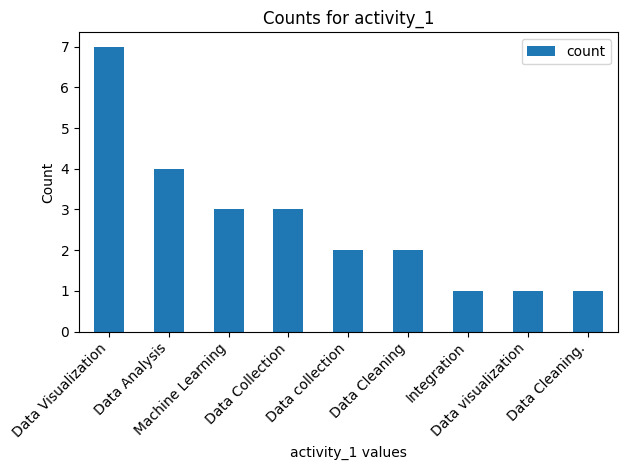

In [7]:
if 'activity_1' in df.columns:
    counts = value_counts_sorted(df['activity_1'])
    plt.figure(figsize=(8, 4))
    counts.plot(kind='bar')
    plt.title("Counts for activity_1")
    plt.xlabel("activity_1 values")
    plt.ylabel("Count")    
    plt.xticks(
        ticks=range(len(counts.index)),
        labels=counts.index,
        rotation=45, ha='right'
    )
  
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()


### 5.2 — `activity_2` counts

In [8]:
if 'activity_2' in df.columns:
    counts_activity_2 = value_counts_sorted(df['activity_2'])
    display(counts_activity_2)
else:
    print("Column 'activity_2' not found in the CSV.")




,count
activity_2,
Data Cleaning,7
Data Analysis,4
Data Transformation,4
Data Visualization,4
Data analysis,1
Data visualization,1
Data transformation,1
Real-Time Processing,1
Data Analysis.,1


<Figure size 800x400 with 0 Axes>

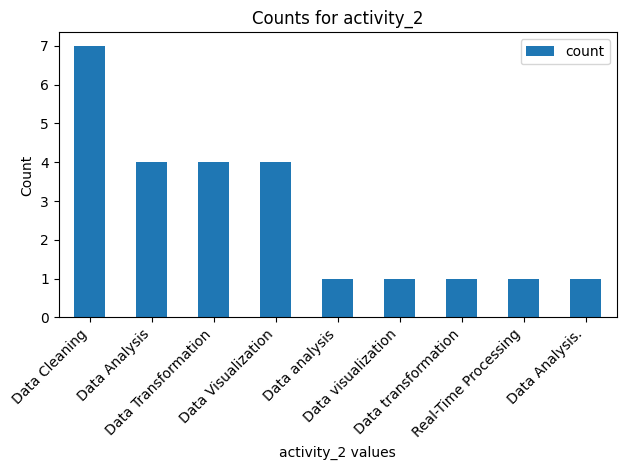

In [9]:
if 'activity_2' in df.columns:
    counts = value_counts_sorted(df['activity_2'])
    plt.figure(figsize=(8, 4))
    counts.plot(kind='bar')
    plt.title("Counts for activity_2")
    plt.xlabel("activity_2 values")
    plt.ylabel("Count")
    plt.xticks(
        ticks=range(len(counts.index)),
        labels=counts.index,
        rotation=45, ha='right'
    )
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()

### 5.3 — `activity_3` counts

In [10]:
if 'activity_3' in df.columns:
    counts_activity_3 = value_counts_sorted(df['activity_3'])
    display(counts_activity_3)
else:
    print("Column 'activity_3' not found in the CSV.")


,count
activity_3,
Real-Time Processing,3
Machine Learning,2
Data Visualization,2
Data Analysis,2
Data Cleaning,2
Data Transformation,2
Data Reporting,1
Data visualization,1
Real Time Processing,1


<Figure size 800x400 with 0 Axes>

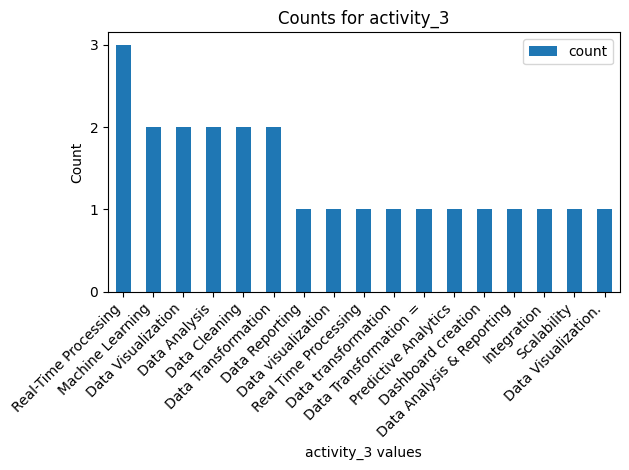

In [11]:
if 'activity_3' in df.columns:
    counts = value_counts_sorted(df['activity_3'])
    plt.figure(figsize=(8, 4))
    counts.plot(kind='bar')
    plt.title("Counts for activity_3")
    plt.xlabel("activity_3 values")
    plt.ylabel("Count")
    plt.xticks(
        ticks=range(len(counts.index)),
        labels=counts.index,
        rotation=45, ha='right'
    )

    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()


### 5.4 — `tool_want_now` counts

In [12]:
if 'tool_not_now' in df.columns:
    counts_tool_not_now = value_counts_sorted(df['tool_want_now'])
    display(counts_tool_not_now)
else:
    print("Column 'tool_not_now' not found in the CSV.")

,count
tool_want_now,
Power BI,10
Apache Spark,8
Tableau,3
Python,2
SAS,1


<Figure size 800x400 with 0 Axes>

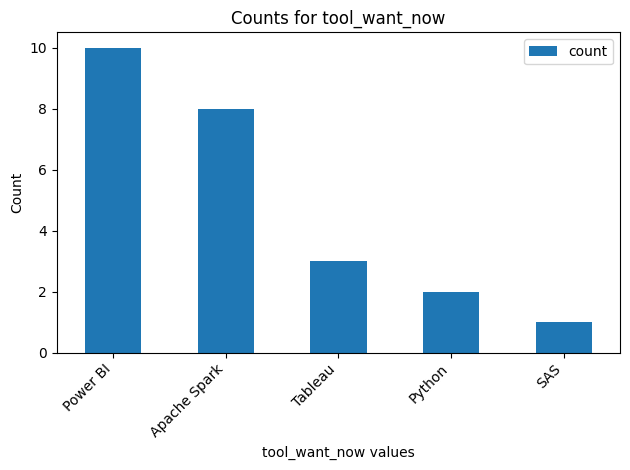

In [13]:
if 'tool_want_now' in df.columns:
    counts = value_counts_sorted(df['tool_want_now'])
    plt.figure(figsize=(8, 4))
    counts.plot(kind='bar')
    plt.title("Counts for tool_want_now")
    plt.xlabel("tool_want_now values")
    plt.ylabel("Count")
    plt.xticks(
        ticks=range(len(counts.index)),
        labels=counts.index,
        rotation=45, ha='right'
    )

    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()


### 5.5 — `tool_not_now` counts

In [14]:
if 'tool_not_now' in df.columns:
    counts_tool_not_now = value_counts_sorted(df['tool_not_now'])
    display(counts_tool_not_now)
else:
    print("Column 'tool_not_now' not found in the CSV.")


,count
tool_not_now,
Shiny,5
Oracle BI,3
Apache Spark,3
Looker,2
Shiny.,1
Hadoop,1
Metabase.,1
PowerBI,1
Apache Spark.,1


<Figure size 800x400 with 0 Axes>

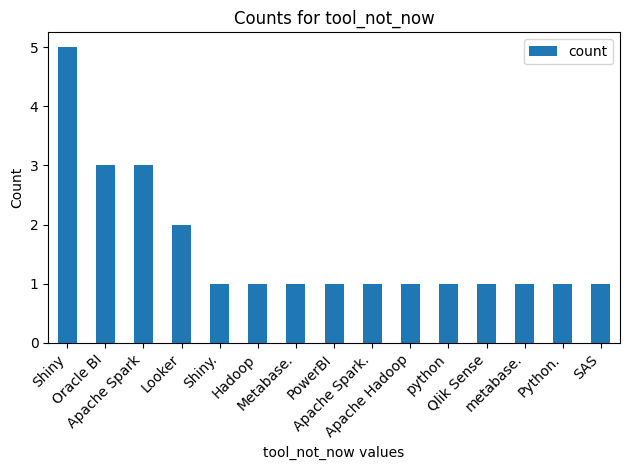

In [15]:
if 'tool_not_now' in df.columns:
    counts = value_counts_sorted(df['tool_not_now'])
    plt.figure(figsize=(8, 4))
    counts.plot(kind='bar')
    plt.title("Counts for tool_not_now")
    plt.xlabel("tool_not_now values")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


## 6. Combined Summary Table (All Columns)

In [16]:

# List of columns we want to summarize
cols_to_check = ['activity_1', 'activity_2', 'activity_3', 'tool_want_now', 'tool_not_now']

summary_list = []
for c in cols_to_check:
    if c in df.columns:
        vc = value_counts_sorted(df[c]).rename(columns={'count': c})
        vc.index.name = 'value'
        summary_list.append(vc)

# Join on index (value) to compare side-by-side
from functools import reduce
if summary_list:
    combined = reduce(lambda left, right: left.join(right, how='outer'), summary_list).fillna(0).astype(int)
    combined = combined.sort_index()
    display(combined)
else:
    print("No target columns found to summarize.")


,activity_1,activity_2,activity_3,tool_want_now,tool_not_now
value,,,,,
Apache Hadoop,0,0,0,0,1
Apache Spark,0,0,0,8,3
Apache Spark.,0,0,0,0,1
Dashboard creation,0,0,1,0,0
Data Analysis,4,4,2,0,0
Data Analysis & Reporting,0,0,1,0,0
Data Analysis.,0,1,0,0,0
Data Cleaning,2,7,2,0,0
Data Cleaning.,1,0,0,0,0


# 7. Dynamic Storytelling Conclusion 

In [17]:
# Find most common activities and tools
most_common_act1 = df['activity_1'].mode().iloc[0] if 'activity_1' in df.columns else "N/A"
most_common_act2 = df['activity_2'].mode().iloc[0] if 'activity_2' in df.columns else "N/A"
most_common_act3 = df['activity_3'].mode().iloc[0] if 'activity_3' in df.columns else "N/A"
most_common_tool_not = df['tool_not_now'].mode().iloc[0] if 'tool_not_now' in df.columns else "N/A"
most_common_tool_want = df['tool_want_now'].mode().iloc[0] if 'tool_want_now' in df.columns else "N/A"

story = f"""
📖 **Storytelling Conclusion**

When looking at the discussion data, a clear picture begins to emerge. 
Most students selected **{most_common_act1}** as their preferred activity, 
showing that many of us value this type of skill. 
The second and third activities were more diverse, with frequent mentions of **{most_common_act2}** and **{most_common_act3}**, 
which suggests that our group is not only focused on analyzing data, 
but also on transforming it and presenting it in a meaningful way.  

For the tools, the story is equally interesting. 
Many students expressed that they **don’t want to learn {most_common_tool_not} right now**, 
perhaps because it feels too advanced or less relevant at this stage.  
On the other hand, the tool that most students **want to learn is {most_common_tool_want}**, 
which reflects our motivation to explore practical, industry-relevant platforms.  

From a **Business Intelligence perspective**, this analysis is valuable because it shows how group preferences 
and motivations can guide future learning priorities. 
If most people want to learn **{most_common_tool_want}**, for example, 
this could be a good area for deeper projects or workshops.  

In summary, this small dataset tells a larger story: 
as a group, we are motivated by **practical skills** that help us make sense of data, 
and we are eager to learn the tools that bring the most value in real-world business intelligence.
"""
print(story)



📖 **Storytelling Conclusion**

When looking at the discussion data, a clear picture begins to emerge. 
Most students selected **Data Visualization** as their preferred activity, 
showing that many of us value this type of skill. 
The second and third activities were more diverse, with frequent mentions of **Data Cleaning** and **Real-Time Processing**, 
which suggests that our group is not only focused on analyzing data, 
but also on transforming it and presenting it in a meaningful way.  

For the tools, the story is equally interesting. 
Many students expressed that they **don’t want to learn Shiny right now**, 
perhaps because it feels too advanced or less relevant at this stage.  
On the other hand, the tool that most students **want to learn is Power BI**, 
which reflects our motivation to explore practical, industry-relevant platforms.  

From a **Business Intelligence perspective**, this analysis is valuable because it shows how group preferences 
and motivations can guide futu